In [30]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

import seaborn as sns
import matplotlib.pyplot as plt
import sys

import skimage
from skimage.color import rgb2hsv
from tqdm import tqdm

In [10]:
sys.path.append(os.path.dirname(os.path.join((os.path.pardir), "Modules")))

origin_dir = os.path.join(os.path.pardir, 'Data')
new_dir_path = os.path.join(os.path.pardir, 'Data', 'cell_images')

#for local systems
train_csv = os.path.join(origin_dir, 'train.csv')
test_csv = os.path.join(origin_dir, 'test.csv')
val_csv = os.path.join(origin_dir, 'val.csv')

from Modules.data_download import Data_Download
from Modules.labelling import Labelling

# download = Data_Download(origin_dir)
# data_dir = download.resize_image(new_dir_path, 44, 44)

lab = Labelling()
lab.label('../Data/cell_images/', exclude_mislabeled= True)      # function to label the dataset
train_csv, val_csv, test_csv = lab.train_test_val_split('../Data/', '../Data/cell_images/labels.csv', random_state = 12345)

In [11]:
train_data = pd.read_csv(train_csv)
val_data   = pd.read_csv(val_csv)
test_data  = pd.read_csv(test_csv)

In [31]:
def read_image(path):
    '''Function to read images given a path and return an array'''
    return skimage.io.imread(path)

../Data/cell_images/Uninfected\C149P110ThinF_IMG_20151115_114629_cell_57.png
0.9833333333333334


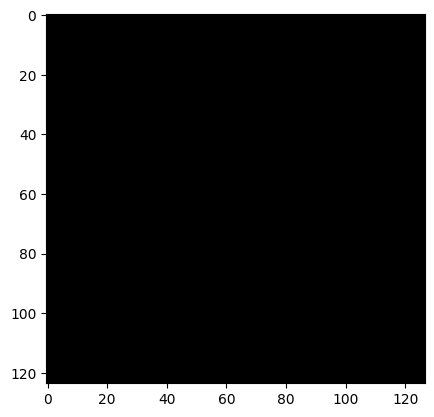

In [105]:
i = 13

print(train_data['Image_Path'][i])
image = rgb2hsv(skimage.io.imread(train_data['Image_Path'][i]))
print(np.max(image))
result = ((image > 0.5)*image)[..., 1]
plt.imshow(result, 'gray')

In [28]:
tqdm.pandas()
train_data['image_arr'] = train_data['Image_Path'].progress_apply(read_image)
val_data['image_arr']   = val_data['Image_Path'].progress_apply(read_image)
test_data['image_arr']  = test_data['Image_Path'].progress_apply(read_image)

100%|██████████| 2617/2617 [00:06<00:00, 378.96it/s]
